<a href="https://colab.research.google.com/github/white-carpet/code-with-serah/blob/main/loan_approvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
df = pd.read_csv('loan_data.csv')

In [121]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [122]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [123]:
df.shape

(45000, 14)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [125]:
df['person_gender']=df['person_gender'].map({'male':1,'female':0})
# Fix: The previous mapping for loan_status was incorrect.
df['loan_status']=df['loan_status'].map({1:1,0:0})
df['person_income']  = df['person_income'].fillna(df['person_income'].mean())
df['loan_int_rate']  = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())
df['person_home_ownership']=df['person_home_ownership'].map({"MORTGAGE":0,"RENT":1,"OWN":2,"OTHER":3})
df['loan_intent']=df['loan_intent'].map({"PERSONAL":0,"AUTO":1,"CREDIT":2,"HOME":3, "DEBTCONSOLIDATION":4, "EDUCATION":5})
df['previous_loan_defaults_on_file']=df['previous_loan_defaults_on_file'].map({"Yes":1,"No":0})

# Convert person_education to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['person_education'], drop_first=True)

In [126]:
multi_cats= ['person_age', 'person_income', 'person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length' ,'credit_score',]
pd.get_dummies(df[multi_cats],drop_first=True)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,22,71948,0,35000,16.02,0.49,3,561
1,21,12282,0,1000,11.14,0.08,2,504
2,25,12438,3,5500,12.87,0.44,3,635
3,23,79753,0,35000,15.23,0.44,2,675
4,24,66135,1,35000,14.27,0.53,4,586
...,...,...,...,...,...,...,...,...
44995,27,47971,6,15000,15.66,0.31,3,645
44996,37,65800,17,9000,14.07,0.14,11,621
44997,33,56942,7,2771,10.02,0.05,10,668
44998,29,33164,4,12000,13.23,0.36,6,604


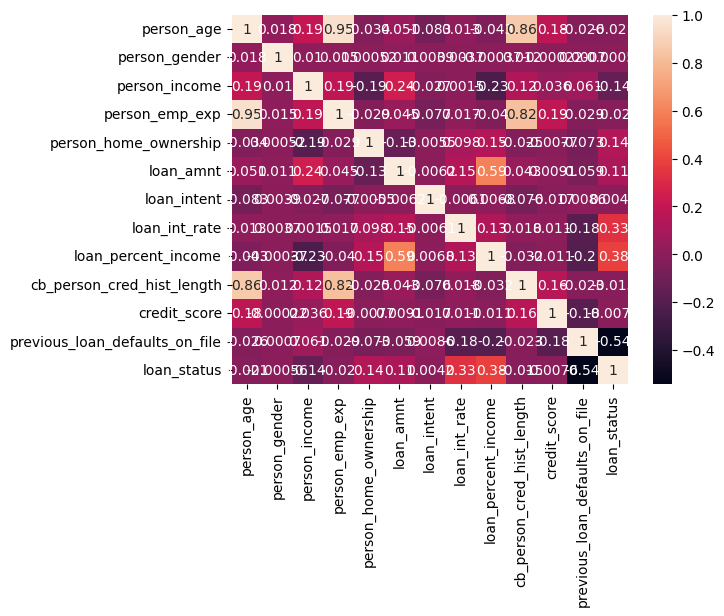

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix only for numeric columns
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True)
plt.show()

In [128]:
df['DTI']=[df['person_income'][i]/df['loan_amnt'][i] for i in range(len(df))]

[1, 2, 0, 3]
Categories (4, int64): [0, 1, 2, 3]
category


<Axes: xlabel='loan_status', ylabel='count'>

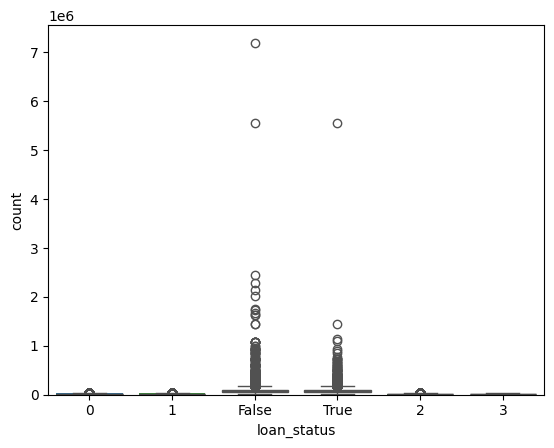

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert person_home_ownership to categorical type for plotting
df['person_home_ownership'] = df['person_home_ownership'].astype('category')

# Check unique values and data type
print(df['person_home_ownership'].unique())
print(df['person_home_ownership'].dtype)

sns.countplot(x='loan_status',data=df)
sns.boxplot(x='person_education_Bachelor',y='person_income',data=df)
sns.countplot(x='person_home_ownership',data=df)
# Explicitly set the order for person_home_ownership in the boxplot
sns.boxplot(x='person_home_ownership',y='loan_amnt',data=df, order=[0, 1, 2, 3])

Now, let's perform the one-hot encoding for the `person_education` column in a separate step to ensure it's handled correctly.

In [130]:
# Check if 'person_education' column exists before one-hot encoding
if 'person_education' in df.columns:
    df = pd.get_dummies(df, columns=['person_education'], drop_first=True)
    print("One-hot encoding applied to 'person_education'.")
else:
    print("'person_education' column not found in the DataFrame.")

# Display the first few rows and info of the updated DataFrame
display(df.head())
df.info()

'person_education' column not found in the DataFrame.


,person_age,person_gender,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,DTI
0,22,0,71948,0,1,35000,0.0,16.02,0.49,3,561,0,1,False,False,False,True,2.055657
1,21,0,12282,0,2,1000,5.0,11.14,0.08,2,504,1,0,False,False,True,False,12.282000
2,25,0,12438,3,0,5500,NaN,12.87,0.44,3,635,0,1,False,False,True,False,2.261455
3,23,0,79753,0,1,35000,NaN,15.23,0.44,2,675,0,1,True,False,False,False,2.278657
4,24,1,66135,1,1,35000,NaN,14.27,0.53,4,586,0,1,False,False,False,True,1.889571


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   person_age                      45000 non-null  int64   
 1   person_gender                   45000 non-null  int64   
 2   person_income                   45000 non-null  int64   
 3   person_emp_exp                  45000 non-null  int64   
 4   person_home_ownership           45000 non-null  category
 5   loan_amnt                       45000 non-null  int64   
 6   loan_intent                     23850 non-null  float64 
 7   loan_int_rate                   45000 non-null  float64 
 8   loan_percent_income             45000 non-null  float64 
 9   cb_person_cred_hist_length      45000 non-null  int64   
 10  credit_score                    45000 non-null  int64   
 11  previous_loan_defaults_on_file  45000 non-null  int64   
 12  loan_status       

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=df.drop('loan_status',axis=1)
y=df['loan_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Fill missing values in the training data with the mean
x_train['loan_intent'] = x_train['loan_intent'].fillna(x_train['loan_intent'].mean())

model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.922
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.87      0.76      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



In [134]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Fill missing values in the test data with the mean from the training data
x_test['loan_intent'] = x_test['loan_intent'].fillna(x_train['loan_intent'].mean())

y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8208888888888889
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6990
           1       0.69      0.37      0.48      2010

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

